In [49]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [50]:
df = pd.read_csv('/content/wine.csv')

In [51]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [52]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


Only quality is object type.

In [54]:
df['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [55]:
df['quality'] = df['quality'].replace({'bad':0,'good':1}).astype(int)

In [56]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [58]:
X = df.iloc[:,:-1]

In [59]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [60]:
Y = df.iloc[:,-1]

In [61]:
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [63]:
X_train.shape

(1279, 11)

In [64]:
X_valid, X_train = X_train[:320], X_train[320:]
y_valid, y_train = y_train[:320], y_train[320:]

In [65]:
# Scaling the values to

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)



In [66]:
LAYERS = [
         tf.keras.layers.Dense(300, activation="relu", input_shape = X_train.shape[1:]),
         tf.keras.layers.Dense(150, activation="relu"),
         tf.keras.layers.Dense(75, activation="relu"),
         tf.keras.layers.Dense(40, activation="relu"),
         tf.keras.layers.Dense(20, activation="relu"),
         tf.keras.layers.Dense(5, activation='relu'),
         tf.keras.layers.Dense(1)

]

In [44]:
model = tf.keras.models.Sequential(LAYERS)

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 300)               3600      
                                                                 
 dense_12 (Dense)            (None, 150)               45150     
                                                                 
 dense_13 (Dense)            (None, 75)                11325     
                                                                 
 dense_14 (Dense)            (None, 40)                3040      
                                                                 
 dense_15 (Dense)            (None, 20)                820       
                                                                 
 dense_16 (Dense)            (None, 5)                 105       
                                                                 
 dense_17 (Dense)            (None, 1)                

In [48]:
LOSS_FUNCTION = "binary_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [69]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/30
30/30 [==============================] - 2s 11ms/step - loss: 8.3317 - accuracy: 0.4599 - val_loss: 7.6161 - val_accuracy: 0.5063
Epoch 2/30
30/30 [==============================] - 0s 7ms/step - loss: 8.3317 - accuracy: 0.4599 - val_loss: 7.6161 - val_accuracy: 0.5063
Epoch 3/30
30/30 [==============================] - 0s 6ms/step - loss: 8.3317 - accuracy: 0.4599 - val_loss: 7.6161 - val_accuracy: 0.5063
Epoch 4/30
30/30 [==============================] - 0s 6ms/step - loss: 8.3317 - accuracy: 0.4599 - val_loss: 7.6161 - val_accuracy: 0.5063
Epoch 5/30
30/30 [==============================] - 0s 7ms/step - loss: 8.3317 - accuracy: 0.4599 - val_loss: 7.6161 - val_accuracy: 0.5063
Epoch 6/30
30/30 [==============================] - 0s 6ms/step - loss: 8.3317 - accuracy: 0.4599 - val_loss: 7.6161 - val_accuracy: 0.5063
Epoch 7/30
30/30 [==============================] - 0s 7ms/step - loss: 8.3317 - accuracy: 0.4599 - val_loss: 7.6161 - val_accuracy: 0.5063
Epoch 8/30
30/30 [=

<Axes: >

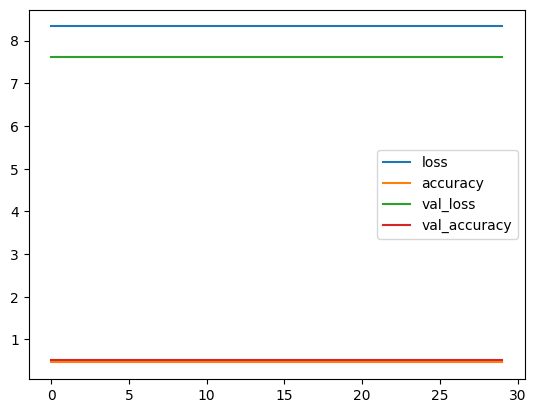

In [70]:
pd.DataFrame(history.history).plot()

In [71]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 8.6283 - accuracy: 0.4406


[8.628331184387207, 0.44062501192092896]